<a href="https://colab.research.google.com/github/dangcaptkd/temp1/blob/master/Fruit_recognition_using_color_extraction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python==3.1.0.4

     |████████████████████████████████| 6.2MB 2.8MB/s 
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.1.0.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
cv2.__version__

'4.1.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
import os
from google.colab.patches import cv2_imshow
import pandas as pd

In [ ]:
def find_contour(cnts, resized_image):
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in cnts:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    #print(contains)
    #print(val)
    if len(val)==0:
      return 0
    return val[0]

In [ ]:
def remove_background(img):
  gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gs, (55,55),0)
  ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  kernel = np.ones((50,50),np.uint8)
  closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
  contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

  black_img = np.empty([200,200,3],dtype=np.uint8)
  black_img.fill(0)

  index = find_contour(contours, img)
  cnt = contours[index]
  mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)

  maskedImg = cv2.bitwise_and(img, mask)

  white_pix = [255,255,255]
  black_pix = [0,0,0]

  final_img = maskedImg
  h,w,channels = final_img.shape
  for x in range(0,w):
      for y in range(0,h):
          channels_xy = final_img[y,x]
          if all(channels_xy == black_pix):    
              final_img[y,x] = white_pix
  
  return final_img

In [ ]:
def features_grid(img):
    features = np.array([], dtype='uint8')
    section = 1
    
    for y in range(0, img.shape[0], 40):
        for x in range(0, img.shape[1], 40):

            # Cropping the image into a section.
            section_img = img[y:y+40, x:x+40]
            
            # Claculating the mean and stdev of the sectioned image.
            section_mean = np.mean(section_img)
            section_std = np.std(section_img)
            
            # Appending the above calculated values into features array.
            features = np.append(features, [section_mean, section_std])
    
    # Returning the features array.
    return features

done 10 image


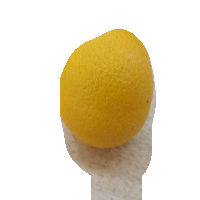

done 20 image


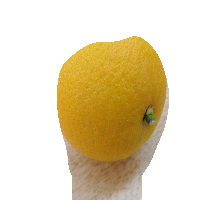

done 30 image


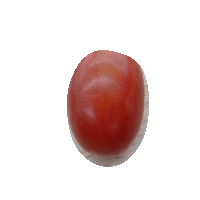

done 40 image


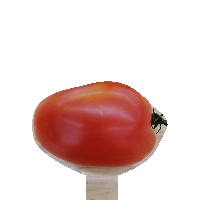

done 50 image


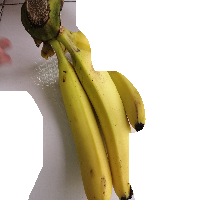

done 60 image


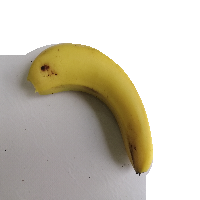

In [ ]:
path = '/content/drive/My Drive/học kì 4 uit/Fruit_60_imgs'
folder_name = os.listdir(path)
dataset = {}
number = 1
for name in folder_name:
  images = []
  for img in os.listdir(path+'/'+name):
    fruit_img = cv2.imread(path+'/'+name+'/'+img)
    resized_img = cv2.resize(fruit_img, (200, 200))
    rb_img = remove_background(resized_img)
    images.append(rb_img)
    #cv2_imshow(rb_img)
    if number%10==0:
      print('done {} image'.format(number))
      cv2_imshow(rb_img)
    number+=1
  dataset[name] = images

In [ ]:
dataset['cachua'][0].shape

(200, 200, 3)

In [ ]:
all_imgs = np.zeros((1, 50), dtype='uint8')
name_fruits = []

In [ ]:
#all_imgs = np.append(all_imgs, img_features, axis=0)
for name in dataset:
  for img in dataset[name]:
    name_fruits.append(name)
    img_features = features_grid(img)
    #img_features = np.append(img_features, name)
    img_features = img_features.reshape(1, img_features.shape[0])

    all_imgs = np.append(all_imgs, img_features, axis=0)

all_imgs = all_imgs[1:]

In [ ]:
all_imgs.shape

(60, 50)

In [ ]:
feature_names = []
section = 1
    
for y in range(0, 200, 40):
    for x in range(0, 200, 40):
        feature_names.append(f"sec{section}_mean")
        feature_names.append(f"sec{section}_std")
        section += 1

In [ ]:
df = pd.DataFrame(all_imgs, columns=feature_names)
df.head()

,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std
0,255.0,0.0,255.0,0.0,240.997917,42.784387,244.629583,38.809802,255.0,0.0,255.0,0.0,210.904583,68.538685,157.355625,68.617308,167.122083,73.385972,254.633125,5.954776,255.0,0.0,147.504583,81.203561,118.632292,71.443527,114.863958,65.631951,249.362708,25.579278,255.000000,0.000000,171.457708,83.039929,97.896458,59.766587,143.090208,74.592127,255.000000,0.000000,255.000000,0.000000,249.137708,25.490374,145.451458,38.057513,235.281042,40.747863,255.000000,0.000000
1,255.0,0.0,255.0,0.0,215.432083,61.066555,218.676875,59.705684,255.0,0.0,255.0,0.0,234.460625,50.553236,148.225833,68.439008,138.117083,66.298360,237.984167,46.479235,255.0,0.0,206.276458,71.538897,126.882083,61.449348,113.075625,64.503749,195.871458,63.604729,255.000000,0.000000,223.457708,58.786151,119.735625,68.434612,106.986875,56.843679,167.947708,25.292991,255.000000,0.000000,255.000000,0.000000,196.491458,58.809175,144.461042,33.787537,164.457500,26.205150
2,255.0,0.0,255.0,0.0,244.740625,38.830921,225.715417,60.299425,255.0,0.0,255.0,0.0,253.215417,17.264567,175.295833,74.812357,140.352500,65.215399,186.575833,68.053463,255.0,0.0,222.249792,66.675479,126.546875,74.312650,110.025625,73.885934,150.506042,59.436931,255.000000,0.000000,222.599375,61.768301,110.061875,71.501647,101.471875,65.217278,194.707917,59.531197,255.000000,0.000000,253.499583,12.345309,145.988542,55.955068,173.085000,64.270181,255.000000,0.000000
3,255.0,0.0,255.0,0.0,254.470625,9.078361,255.000000,0.000000,255.0,0.0,255.0,0.0,244.151250,40.371721,164.369167,77.095679,201.943750,69.575952,255.000000,0.000000,255.0,0.0,190.076458,78.091470,140.571042,69.412436,140.358542,69.184789,247.091875,28.445242,227.753333,42.868996,144.961458,61.480423,110.751667,69.199503,114.276042,66.087047,200.908958,50.379219,167.841875,29.689957,144.565208,34.806877,127.418750,51.781742,131.373333,41.699228,151.464167,33.031115
4,255.0,0.0,255.0,0.0,250.029167,26.273275,248.145417,32.535694,255.0,0.0,255.0,0.0,244.839167,37.625717,163.560417,71.434779,159.697917,74.110809,248.203750,29.552308,255.0,0.0,192.776875,76.245751,118.653958,67.093567,132.781875,67.735415,181.968750,61.272981,229.462917,42.210685,141.808333,55.815450,108.662500,66.973240,116.958125,63.289722,153.314792,55.220885,235.480208,38.116046,157.176042,33.810767,125.377500,58.168555,125.131250,52.583951,150.344167,33.375900


In [ ]:
df.insert(loc=0, column="name", value=name_fruits)
df.head()

,name,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std
0,cam,255.0,0.0,255.0,0.0,240.997917,42.784387,244.629583,38.809802,255.0,0.0,255.0,0.0,210.904583,68.538685,157.355625,68.617308,167.122083,73.385972,254.633125,5.954776,255.0,0.0,147.504583,81.203561,118.632292,71.443527,114.863958,65.631951,249.362708,25.579278,255.000000,0.000000,171.457708,83.039929,97.896458,59.766587,143.090208,74.592127,255.000000,0.000000,255.000000,0.000000,249.137708,25.490374,145.451458,38.057513,235.281042,40.747863,255.000000,0.000000
1,cam,255.0,0.0,255.0,0.0,215.432083,61.066555,218.676875,59.705684,255.0,0.0,255.0,0.0,234.460625,50.553236,148.225833,68.439008,138.117083,66.298360,237.984167,46.479235,255.0,0.0,206.276458,71.538897,126.882083,61.449348,113.075625,64.503749,195.871458,63.604729,255.000000,0.000000,223.457708,58.786151,119.735625,68.434612,106.986875,56.843679,167.947708,25.292991,255.000000,0.000000,255.000000,0.000000,196.491458,58.809175,144.461042,33.787537,164.457500,26.205150
2,cam,255.0,0.0,255.0,0.0,244.740625,38.830921,225.715417,60.299425,255.0,0.0,255.0,0.0,253.215417,17.264567,175.295833,74.812357,140.352500,65.215399,186.575833,68.053463,255.0,0.0,222.249792,66.675479,126.546875,74.312650,110.025625,73.885934,150.506042,59.436931,255.000000,0.000000,222.599375,61.768301,110.061875,71.501647,101.471875,65.217278,194.707917,59.531197,255.000000,0.000000,253.499583,12.345309,145.988542,55.955068,173.085000,64.270181,255.000000,0.000000
3,cam,255.0,0.0,255.0,0.0,254.470625,9.078361,255.000000,0.000000,255.0,0.0,255.0,0.0,244.151250,40.371721,164.369167,77.095679,201.943750,69.575952,255.000000,0.000000,255.0,0.0,190.076458,78.091470,140.571042,69.412436,140.358542,69.184789,247.091875,28.445242,227.753333,42.868996,144.961458,61.480423,110.751667,69.199503,114.276042,66.087047,200.908958,50.379219,167.841875,29.689957,144.565208,34.806877,127.418750,51.781742,131.373333,41.699228,151.464167,33.031115
4,cam,255.0,0.0,255.0,0.0,250.029167,26.273275,248.145417,32.535694,255.0,0.0,255.0,0.0,244.839167,37.625717,163.560417,71.434779,159.697917,74.110809,248.203750,29.552308,255.0,0.0,192.776875,76.245751,118.653958,67.093567,132.781875,67.735415,181.968750,61.272981,229.462917,42.210685,141.808333,55.815450,108.662500,66.973240,116.958125,63.289722,153.314792,55.220885,235.480208,38.116046,157.176042,33.810767,125.377500,58.168555,125.131250,52.583951,150.344167,33.375900


In [ ]:
labels = df['name']
features = df.drop(['name'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(45, 50)
(15, 50)
(45,)
(15,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [ ]:
models = []
models.append(('rfc', RandomForestClassifier()))
models.append(('svc', SVC()))
models.append(('knn', KNeighborsClassifier()))


for name, model in models:
  print(name)
  model.fit(X_train, Y_train)
  #print('\ttrain', accuracy_score(Y_train, Y_test))
  pred = model.predict(X_test)
  print('\ttest', accuracy_score(Y_test, pred))

rfc
	test 0.9333333333333333
svc
	test 0.8666666666666667
knn
	test 0.8666666666666667


In [ ]:
def create_df_with_one_img(img):
  all_imgs = np.zeros((1, 50), dtype='uint8')
  img_features = features_grid(img)
  #img_features = np.append(img_features, name)
  img_features = img_features.reshape(1, img_features.shape[0])

  all_imgs = np.append(all_imgs, img_features, axis=0)
  df = pd.DataFrame(all_imgs[1:], columns=feature_names)
  return df

In [ ]:
img = cv2.imread('/content/cachua.jpg')
img = cv2.resize(img, (200, 200))
img = remove_background(img)

df = create_df_with_one_img(img)
df.head()

,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std
0,255.0,0.0,246.079792,35.646004,215.511458,73.025705,250.5675,26.282369,255.0,0.0,228.031042,69.87533,158.575208,76.016115,134.77625,71.036085,152.876042,75.428017,201.595833,88.430102,175.579583,96.784093,91.119583,90.19167,101.581667,90.349587,93.440625,91.743471,146.918125,99.001503,201.2175,86.680675,78.362708,82.426975,85.87,78.674343,103.792917,75.824328,210.192292,65.957321,254.129167,11.13274,154.82375,87.580048,113.816875,77.960356,159.087917,71.5727,254.177292,9.679877


In [ ]:
for name, model in models:
  pred = model.predict(df)
  print(name, pred)

rfc ['chuoi']
svc ['chuoi']
knn ['cachua']


In [ ]:
path = '/content/drive/My Drive/học kì 4 uit/Fruit_60_imgs'
folder_name = os.listdir(path)
for name in folder_name:
  for img in os.listdir(path+'/'+name):
    print(img)

cam_0.jpg
cam_1.jpg
cam_12.jpg
cam_2.jpg
cam_3.jpg
cam_4.jpg
cam_5.jpg
cam_6.jpg
cam_7.jpg
cam_8.jpg
cam_9.jpg
cam_10.jpg
cam_11.jpg
cam_13.jpg
cam_14.jpg
cam_15.jpg
cam_16.jpg
cam_17.jpg
cam_18.jpg
cam_19.jpg
cachua_7.jpg
cachua_12.jpg
cachua_13.jpg
cachua_17.jpg
cachua_14.jpg
cachua_15.jpg
cachua_3.jpg
cachua_19.jpg
cachua_18.jpg
cachua_5.jpg
cachua_4.jpg
cachua_0.jpg
cachua_6.jpg
cachua_8.jpg
cachua_9.jpg
cachua_1.jpg
cachua_10.jpg
cachua_16.jpg
cachua_2.jpg
cachua_11.jpg
chuoi_0.jpg
chuoi_1.jpg
chuoi_12.jpg
chuoi_2.jpg
chuoi_3.jpg
chuoi_4.jpg
chuoi_6.jpg
chuoi_7.jpg
chuoi_9.jpg
chuoi_8.jpg
chuoi_10.jpg
chuoi_11.jpg
chuoi_13.jpg
chuoi_14.jpg
chuoi_15.jpg
chuoi_16.jpg
chuoi_17.jpg
chuoi_18.jpg
chuoi_19.jpg
chuoi_20.jpg
